LMS Algorithm Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

System Identification Results: 
True system: [ 0.8 -0.4  0.2  0.1]
Estimated system: [ 0.20115601  0.0945771  -0.06295762  0.00480753]
Final MSE: 0.954318


C:\Users\jneec\AppData\Roaming\Python\Python312\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\jneec\AppData\Roaming\Python\Python312\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\jneec\AppData\Local\Temp\ipykernel_21184\1151941807.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


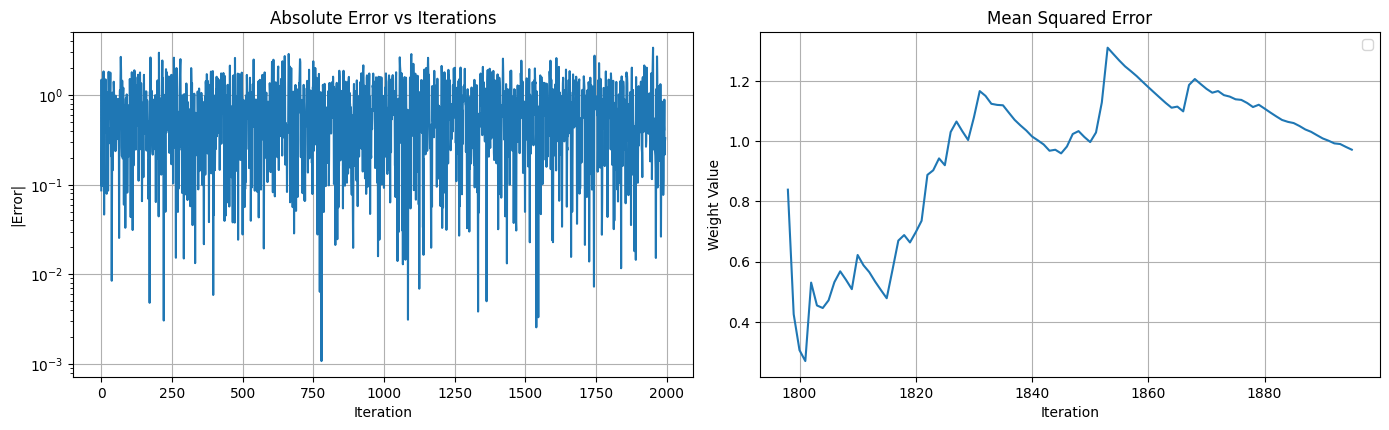

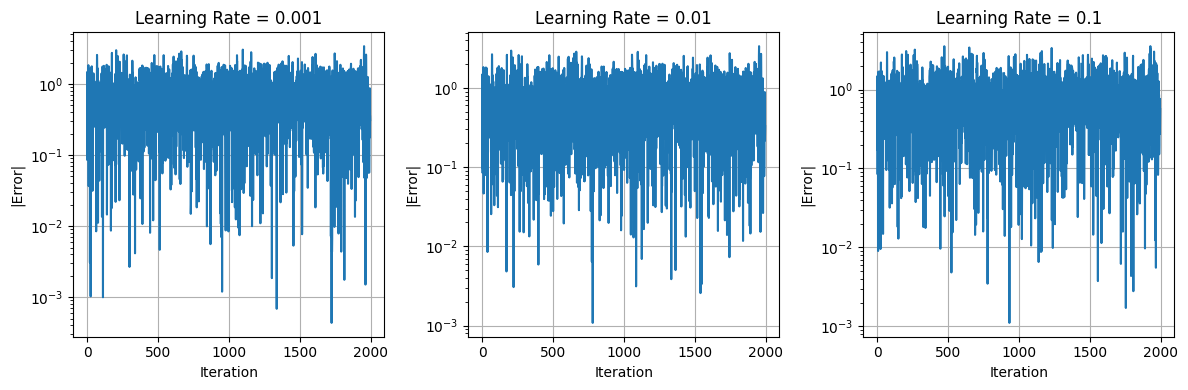

In [2]:
class LMSFilter:
    """Least Mean square adaptive filter"""
    def __init__(self, n_taps: int, learning_rate: float = 0.01):
        self.n_taps = n_taps
        self.learning_rate = learning_rate
        self.weights = np.zeros(n_taps)
        self.error_history = []
        self.weight_history = []

    def filter(self, x: np.ndarray, d: np.ndarray):
        """LMS Filter apply"""
        n_samples = len(x)
        y = np.zeros(n_samples)

        for n in range(self.n_taps, n_samples):
            x_n = x[n-self.n_taps:n][::-1] #Reverse for convolution

            y[n] = np.dot(self.weights, x_n)

            error = d[n] - y[n]
            self.error_history.append(error)

            self.weights += self.learning_rate * error * x_n
            self.weight_history.append(self.weights.copy())

        return y

    def plot_learning_curve(self):
        plt.figure(figsize=(14, 8))

        plt.subplot(2, 2, 1)
        plt.plot(np.abs(self.error_history))
        plt.title('Absolute Error vs Iterations')
        plt.xlabel('Iteration')
        plt.ylabel('|Error|')
        plt.yscale('log')
        plt.grid(True)

        plt.subplot(2, 2, 2)
        window_size = 100
        mse = []
        for i in range(window_size, len(self.error_history)):
            mse.append(np.mean(np.array(self.error_history[1-window_size:i]) ** 2))
        plt.plot(mse)
        plt.title('Mean Squared Error')
        plt.xlabel('Iteration')
        plt.ylabel('Weight Value')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

def generative_system_identification_data(n_samples: int = 1000):
    np.random.seed(42)
    unknow_system = np.array([0.8, -0.4, 0.2, 0.1])
    x = np.random.randn(n_samples)
    d = np.convolve(x, unknow_system, mode='same') + 0.1 * np.random.randn(n_samples)

    return x, d, unknow_system

x, d, true_system = generative_system_identification_data(2000)

lms = LMSFilter(n_taps=4, learning_rate=0.01)
y = lms.filter (x, d)

print("System Identification Results: ")
print(f"True system: {true_system}")
print(f"Estimated system: {lms.weights}")
print(f"Final MSE: {np.mean(np.array(lms.error_history[-100:])**2):.6f}")

lms.plot_learning_curve()

learning_rates = [0.001, 0.01, 0.1]
plt.figure(figsize=(12, 4))

for i, lr in enumerate(learning_rates):
    lms_temp = LMSFilter(n_taps=4, learning_rate=lr)
    lms_temp.filter(x, d)

    plt.subplot(1, 3, i+1)
    plt.plot(np.abs(lms_temp.error_history))
    plt.title(f'Learning Rate = {lr}')
    plt.xlabel('Iteration')
    plt.ylabel('|Error|')
    plt.yscale('log')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [3]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
#Dataset loading
iris = load_iris()
X = iris.data
y = iris.target

In [5]:
#Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

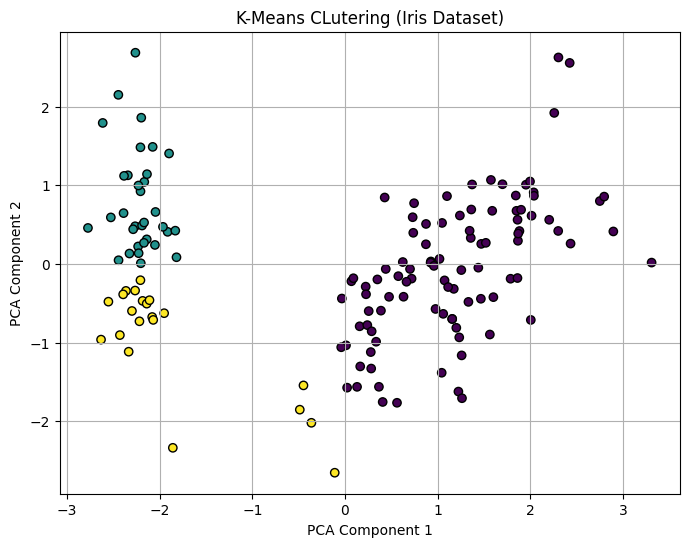

In [7]:
#Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
y_kmeans = kmeans.labels_

#PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k')
plt.title("K-Means CLutering (Iris Dataset)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show() 

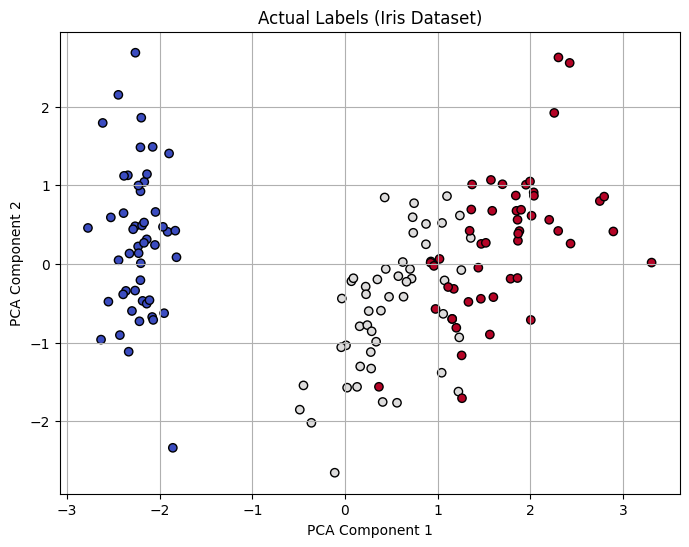

In [8]:
#Comparison with true Labels
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title("Actual Labels (Iris Dataset)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

In [10]:
#Print Cluster centers
print("\nCluster Centers: ")
print(kmeans.cluster_centers_)

#Evaluate clustering with inertia
print(f"\nInertia (Sum of squared distances): {kmeans.inertia_:.2f}")


Cluster Centers: 
[[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]

Inertia (Sum of squared distances): 191.02
